# RANDOM FOREST

# Random forest is a supervised learning algorithm

**Decision Trees is the fundamental block of Random Forest**

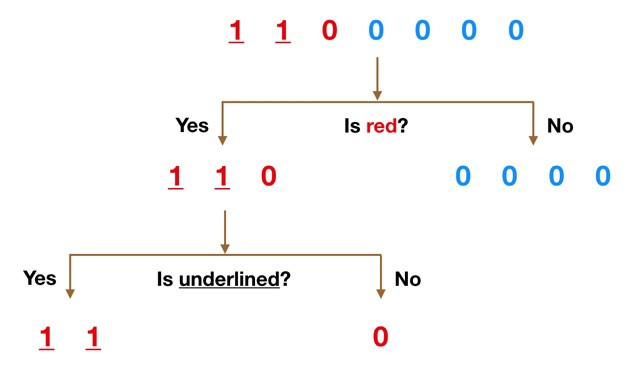

# **Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction**

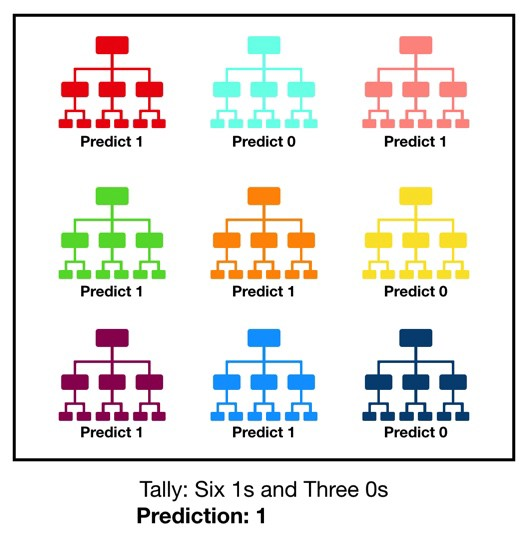

# The low correlation between models is the key.The reason for this wonderful effect is that the trees protect each other from their individual errors. While some trees may be wrong, many other trees will be right, so as a group the trees are able to move in the correct direction.

# Bagging (Bootstrap Aggregation) — Decisions trees are very sensitive to the data they are trained on — small changes to the training set can result in significantly different tree structures. Random forest takes advantage of this by allowing each individual tree to randomly sample from the dataset with replacement, resulting in different trees. This process is known as bagging.For example, if our training data was [1, 2, 3, 4, 5, 6] then we might give one of our trees the following list [1, 2, 2, 3, 6, 6]

Feature Randomness 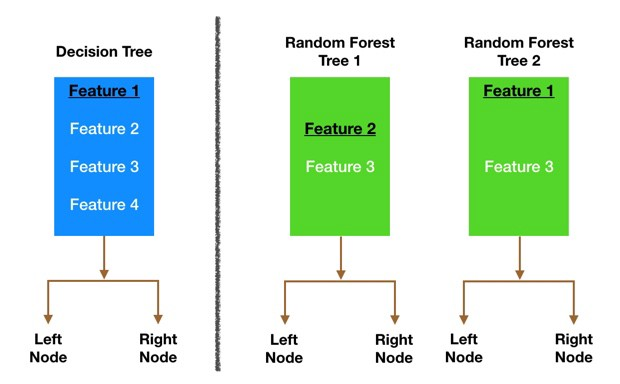

# So in our random forest, we end up with trees that are not only trained on different sets of data (thanks to bagging) but also use different features to make decisions.

# ADVANTAGES AND DISADVANTAGES OF THE RANDOM FOREST ALGORITHM

****One of the biggest advantages of random forest is its versatility. It can be used for both regression and classification tasks.One of the biggest problems in machine learning is overfitting, but most of the time this won’t happen thanks to the random forest classifier. ****

**The main limitation of random forest is that a large number of trees can make the algorithm too slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained.******

# What do we need in order for our random forest to make accurate class predictions?
We need features that have at least some predictive power. After all, if we put garbage in then we will get garbage out.
The trees of the forest and more importantly their predictions need to be uncorrelated (or at least have low correlations with each other).

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
Data = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')
Data

In [ ]:
Data.columns

In [ ]:
for i in Data.columns:
    print('this {} column has unique_vlaues = \n'.format(i),Data[i].value_counts())

In [ ]:
for i in Data.columns: 
    a = Data[i].isnull().sum()
    if a !=0:
        print(i,' has ', Data[i].isnull().sum())
    else:
        print('no null values')

# Mapping of feature values

**We will start with colors first**

In [ ]:

color = {"b": 0, "c": 1,"e": 2, "g": 3,"n": 4, "p": 5,"r": 6, "u": 7,"w": 8, "y": 9}


for i, j in color.items():
    Data["cap-color"] = Data["cap-color"].replace(i, j)

In [ ]:
Data['gill-color'].unique()

In [ ]:

color = {"b": 0,"e": 2, "g": 3,"n": 4, "p": 5,"r": 6, "u": 7,"w": 8, "y": 9, 'h':10,'k':11,'o':12}


for i, j in color.items():
    Data["gill-color"] = Data["gill-color"].replace(i, j)

In [ ]:
Data['veil-color'].unique()

In [ ]:

color = {"n": 4,"w": 8, "y": 9,'o':12}


for i, j in color.items():
    Data["veil-color"] = Data["veil-color"].replace(i, j)

In [ ]:
Data['spore-print-color'].unique()

In [ ]:
color = {"b": 0,"n": 4,"r": 6, "u": 7,"w": 8, "y": 9, 'h':10,'k':11,'o':12}


for i, j in color.items():
    Data["spore-print-color"] = Data["spore-print-color"].replace(i, j)

In [ ]:
Data['stalk-color-above-ring'].unique()

In [ ]:

color = {"b": 0, "c": 1,"e": 2, "g": 3,"n": 4, "p": 5, "w": 8, "y": 9,'o':12}


for i, j in color.items():
    Data["stalk-color-above-ring"] = Data["stalk-color-above-ring"].replace(i, j)

In [ ]:
Data['stalk-color-below-ring'].unique()

In [ ]:

color = {"b": 0, "c": 1,"e": 2, "g": 3,"n": 4, "p": 5, "w": 8, "y": 9,'o':12}


for i, j in color.items():
    Data["stalk-color-below-ring"] = Data["stalk-color-below-ring"].replace(i, j)

In [ ]:
Data['cap-shape'].unique()

In [ ]:
color = {"b": 0,"c": 1,"f": 2, "k": 3,"s": 4, "x": 5}


for i, j in color.items():
    Data["cap-shape"] = Data["cap-shape"].replace(i, j)

In [ ]:
Data['cap-surface'].unique()

In [ ]:
color = {"f": 2,"s": 4, 'g':6,'y':7}


for i, j in color.items():
    Data["cap-surface"] = Data["cap-surface"].replace(i, j)

In [ ]:
Data['bruises'].unique()

In [ ]:
color = {"f": 0,"t": 1}


for i, j in color.items():
    Data["bruises"] = Data["bruises"].replace(i, j)

In [ ]:
Data['odor'].unique()

In [ ]:
color = {'a':0,'c':1,'f':2,'l':3,'m':4,'n':5,'p':6,'s':7,'y':8}


for i, j in color.items():
    Data["odor"] = Data["odor"].replace(i, j)

In [ ]:
Data['gill-attachment'].unique()

In [ ]:
color = {"f": 0,"a": 1}


for i, j in color.items():
    Data["gill-attachment"] = Data["gill-attachment"].replace(i, j)

In [ ]:
Data['gill-spacing'].unique()

In [ ]:
color = {"c": 0,"w": 1}


for i, j in color.items():
    Data["gill-spacing"] = Data["gill-spacing"].replace(i, j)

In [ ]:
Data['gill-size'].unique()

In [ ]:
color = {"n": 0,"b": 1}


for i, j in color.items():
    Data["gill-size"] = Data["gill-size"].replace(i, j)

In [ ]:
Data['stalk-shape'].unique()

In [ ]:
color = {"e": 0,"t": 1}


for i, j in color.items():
    Data["stalk-shape"] = Data["stalk-shape"].replace(i, j)

In [ ]:
Data['stalk-root'].unique()

In [ ]:
color = {"b": 0,"c": 1,'e':2,'r':3,'?':4}


for i, j in color.items():
    Data["stalk-root"] = Data["stalk-root"].replace(i, j)

In [ ]:
Data['stalk-surface-above-ring'].unique()

In [ ]:
color = {"f": 0,"k": 1,'s':2,'y':3}


for i, j in color.items():
    Data["stalk-surface-above-ring"] = Data["stalk-surface-above-ring"].replace(i, j)

In [ ]:
Data['stalk-surface-below-ring'].unique()

In [ ]:
color = {"f": 0,"k": 1,'s':2,'y':3}


for i, j in color.items():
    Data["stalk-surface-below-ring"] = Data["stalk-surface-below-ring"].replace(i, j)

In [ ]:
Data['veil-type'].unique()

In [ ]:
color = {"p": 0}


for i, j in color.items():
    Data["veil-type"] = Data["veil-type"].replace(i, j)

In [ ]:
Data['ring-number'].unique()

In [ ]:
color = {"o": 0,'t':1, 'n':2}


for i, j in color.items():
    Data["ring-number"] = Data["ring-number"].replace(i, j)

In [ ]:
Data['ring-type'].unique()

In [ ]:
color = {"e": 0,'f':1, 'l':2, 'n':3, 'p':4}


for i, j in color.items():
    Data["ring-type"] = Data["ring-type"].replace(i, j)

In [ ]:
Data['population'].unique()

In [ ]:
color = {"a": 0,'c':1, 'n':2, 's':3, 'v':4, 'y':5}


for i, j in color.items():
    Data["population"] = Data["population"].replace(i, j)

In [ ]:
Data['habitat'].unique()

In [ ]:
color = {"d": 0,'g':1, 'l':2, 'm':3, 'p':4, 'u':5, 'w':6}


for i, j in color.items():
    Data["habitat"] = Data["habitat"].replace(i, j)

In [ ]:
Data['class'].unique()

In [ ]:
color = {"e": 0,'p':1}


for i, j in color.items():
    Data["class"] = Data["class"].replace(i, j)

# We are done with Feature Labeling

In [ ]:
Data

# We have Record of 8123 Rows, Lets Take 7000 records for Training and 1123 records will be for Testing our model.

In [ ]:
Train = Data.iloc[:7000, :]
Test = Data.iloc[7000:, :]

In [ ]:
Train

In [ ]:
X = Train.drop(columns=['class'])
Y = Train['class']

In [ ]:
test_data = Test.drop(columns='class')
test_class = Test['class']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X, Y)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
prediction = model.predict(test_data)
print('accuracy_score is ', (accuracy_score(prediction, test_class)))
print('classification_report is ', (classification_report(prediction, test_class)))
print('confusion_matrix is \n', (confusion_matrix(prediction, test_class)))